In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.insert(1, "../python/functions")
sys.path.insert(2, "../python/architecture")

In [3]:
from data_prep_functions import mnist_prep
from plotting_functions import nn_plot_acc
from enkf_functions import enkf_classifier_extension
from saving_functions import load_objects
from model_functions import nn_load
import reproducible
import no_gpu

In [4]:
X_train, X_test, y_train, y_test = mnist_prep()

In [5]:
# use samller dataset for increased speed
X_train = X_train[:1000, :]
X_test = X_test[:500, :]
y_train = y_train[:1000]
y_test = y_test[:500]

In [9]:
setting_dict = {"particles": 10,
                "epochs": 10,
                "batch_size": 50,    # len(X_train)
                "h_0": 2,
                "delta": 0.005,
                "epsilon": 0.5,
                "randomization": False,
                "shuffle": True,
                "early_stopping": False,
                "early_stopping_diff": 0.001
               }

additional_epochs = 10

In [10]:
import time
start_time = time.time()

In [11]:
mean_model = enkf_classifier_extension(extend_model = "../models/mnist/mnist_enkf_E{}_B{}_P{}_H{}.h5".format(setting_dict["epochs"], setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]),
                                       additional_epochs = additional_epochs,
                                       save_all = True,
                                       verbose = 1)

Epoch 11. Training Accuracy: 0.138, Test Accuracy: 0.12.
Epoch 12. Training Accuracy: 0.137, Test Accuracy: 0.12.
Epoch 13. Training Accuracy: 0.137, Test Accuracy: 0.12.
Epoch 14. Training Accuracy: 0.138, Test Accuracy: 0.12.
Epoch 15. Training Accuracy: 0.137, Test Accuracy: 0.12.
Epoch 16. Training Accuracy: 0.138, Test Accuracy: 0.118.
Epoch 17. Training Accuracy: 0.138, Test Accuracy: 0.116.
Epoch 18. Training Accuracy: 0.136, Test Accuracy: 0.118.
Epoch 19. Training Accuracy: 0.135, Test Accuracy: 0.116.
Epoch 20. Training Accuracy: 0.135, Test Accuracy: 0.116.


In [12]:
end_time = time.time()
print("Calculation time: {} minutes.".format((end_time - start_time) / 60))

Calculation time: 1.4651498476664224 minutes.


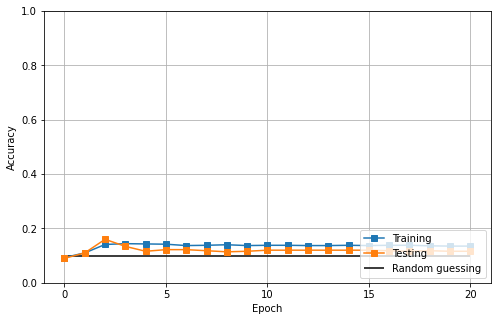

In [14]:
nn_plot_acc(mean_model,
            mean_comparison = 0.1,
            start_epoch = 1,
            savefig = True,
            file = "../img/mnist/mnist_enkf_E{}_B{}_P{}_H{}.png".format(setting_dict["epochs"]+additional_epochs, setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]))

In [15]:
obj_dict = load_objects("../objects/mnist/enkf_mnist_E{}_B{}_P{}_H{}.pckl".format(setting_dict["epochs"]+additional_epochs, setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]))

In [16]:
final_model = nn_load("../models/mnist/enkf_mnist_E{}_B{}_P{}_H{}.h5".format(setting_dict["epochs"]+additional_epochs, setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]))